# 딥러닝 들여다 보기

#### 신경망(Neural Network)

우리 뇌에는 1000억 개에 가까운 신경계 뉴런들이 있다. 이 뉴런들은 서로 매우 복잡하게 얽혀 있고, 조금 물러서서 보면 하나의 거대한 그물망과 같은 형태를 이루고 있다. 보통 우리는 이를 신경망이라고 부른다.

예전부터 인류는 자연의 모습을 본떠 인공적인 물건을 만들려는 시도를 많이 해왔다. 물론 이것이 자연의 모습을 본뜬 것만이 성공적이라는 뜻은 아니다.

머신러닝/딥러닝 과학자들로 자연에서 답을 찾으려 노력했고, 우리 뇌 속의 신경망 구조에 착안해서 퍼셉트론(Perceotron)이라는 형태를 제안하며 이를 연결한 형태를 인공신경망(Artifical Neural Network)이라고 부르기 시작했다.

### MNIST Revisited

딥러닝 프레임 워크를 이용하면 몇 줄 안 되는 코드만으로 MNIST 데이터셋을 99%이상의 정확도로 분류할 수 있는 이미지 분류기를 만들 수 있으며, 이를 활용해서 다양한 카테고리의 이미지 분류기로 확장해 나갈 수 있다.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4926 - accuracy: 0.8802
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2305 - accuracy: 0.9357
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1797 - accuracy: 0.9485
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0

이미지 분류는 Conv2D가 특화되어 있다. 하지만, 가장 기본적인 신경망 형태인 다층 퍼셉트론만을 이용해서 더욱 간단하게 구현해 보았다. 뇌 속의 뉴런이 1000억 개라지만 위에서 만든 모델은 굳이 Conv2D를 사용하지 않았는데 39,760개의 파라미터만으로 테스트 성능이 97%에 육박하고 있다.

### 다층 퍼셉트론 Overview

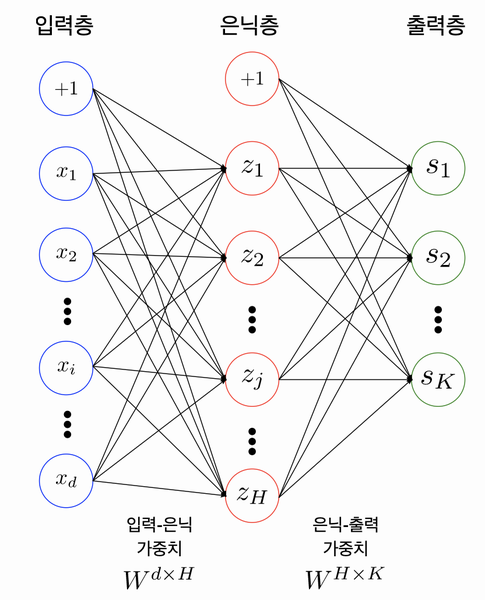

위의 이미지는 총 3개의 레이어로 구성된 퍼셉트론을 나타낸다. 위에서 보았던 예시 코드와도 동일하다. 은닉층에는 H개의 노드가, 출력층에는 K개의 노드가 존재하는 인공신경망을 표현한 것이다. (+1 부분은 bias를 뜻하는 부분이므로 이전 레이어와의 연결이 없다.) 위으 코드에서는 H=50, k=10, 그리고 입력층 노드 개수 d=784로 정의 되었다.

이제 각 레이어에 대해 한 번 알아보겠다.

위의 이미지를 보면 입력값이 있는 입력층(input layer), 최종 출력값이 있는 출력층(output layer), 그리고 그 사이에 있는 층인 은닉층(hidden layer)이 있다.

보통 입력층과 출력층 사이에 몇 개의 층이 존재하든 모두 은닉층이라고 부른다.

보통 그림으로 인공신경망을 표현할 때에는 노드를 기준으로 레이어를 표시해서 3개의 레이어라고 생각할 수 있지만, 실제로는 총 2개의 레이어를 가졌다.

레이어 개수를 셀 때는 노드와 노드 사이의 연결하는 부분이 몇 개 존재하는 지 세면 보다 쉽게 알 수 있다.

이렇게 인공신경망이 어떻게 생겼는지 대략 알아봤다. 인공신경망 중에서도 위의 이미지처럼 2개 이상의 레이어를 쌓아서 만든 것을 보통 다층 퍼셉트론(Multi-Layer Perceptron; MLP)이라고 부른다. 그리고 입력층, 출력층을 제외한 은닉층이 많아지면 많아질 수록 인공신경망이 Deep해졌다고 얘기한다.

지금 알아보려고 하는 딥러닝이 바로 이 인공신경망이 DEEP 해졌다는 뜻에서 나온 단어다. 그래서 우리가 하려는 딥러닝은 충분히 깊은 인공신경망을 활용하여 이를 보통 다른 단어로 DNN(Deep Neural Network)라고 부른다.

#### Parameters/Weights


앞에서 설명한 입력층-은닉층, 은닉층-출력층 사이에는 사실 각각 행렬(Matrix)이 존재합니다.

예를 들어 입력값이 100개, 은닉 노드가 20개라면 입력층-은닉층의 모든 노드-노드 쌍에 대해 연결이 존재하므로 사실 입력층-은닉층 사이에는 100x20의 형태를 가진 행렬이 존재한다. 똑같이, MNIST 데이터처럼 10개의 클래스를 맞추는 문제를 풀기 위해 출력층이 10개의 노드를 가진다면 은닉층-출력층 사이에는 20x10의 형태를 가진 행렬이 존재하게 된다.

이 행렬들을 Parameter 혹은 Weight라고 부른다. 두 단어는 보통 같은 뜻으로 사용되지만, 실제로 Parameter에는 위의 참고 자료에서 다룬 bias 노드도 포함된다는 점만 유의하자.

이때 인접한 레이어 사이에는 아래와 같은 관계가 성립한다.

y = W * X + b

In [3]:
# MLP기반 딥러닝 모델을 Numpy로 만들어 보자.

# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [4]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [5]:
# 첫 번째 데이터의 은닉층 출력을 확인해 봅시다.  50dim의 벡터가 나오나요?
a1[0]

array([ 0.87902676,  1.53179023,  0.42123666, -0.74318614, -1.06329567,
       -1.06153737,  0.8482594 , -0.3546065 , -0.77373027,  0.07978567,
        0.32796042, -0.28246851, -0.00213853, -0.36601984, -0.31296195,
       -1.08947339,  0.31003985,  2.11673775,  0.93775173,  0.39515631,
        0.81764743, -0.14038634, -0.01091586, -0.73153353, -1.45210642,
        0.95141579, -1.26706853, -0.07019801,  0.53300306, -0.25244866,
       -1.72639672,  0.70541421, -0.73606821, -0.53199941, -0.92479453,
       -0.48131822, -1.66566286,  0.36763765,  0.63098003,  1.12038544,
        0.6469585 ,  0.77006421, -0.41534835,  0.89277134,  2.10958941,
        0.20696542, -0.0519233 , -1.30932738, -0.33991867, -0.35330507])

### 신경망 구성(2) 활성화 함수와 손실함수

#### 활성화 함수 (Activation Functions)

MLP의 또 다른 중요한 구성요소는 바로 활성화 함수다. 딥러닝에서는 이 활성화 함수의 존재가 필수적이다. 이 함수는 보통 비선형 함수를 사용하는데 이 비선형 함수를 MLP 안에 포함시키면서 모델의 표현력이 좋아지게 된다.(정확히는 레이어 사이에 이 비선형 함수가 포함되지 않은 MLP는 한 개의 레이어로 이루어진 모델과 수학적으로 다른 점이 없다.)

#### Sigmoid

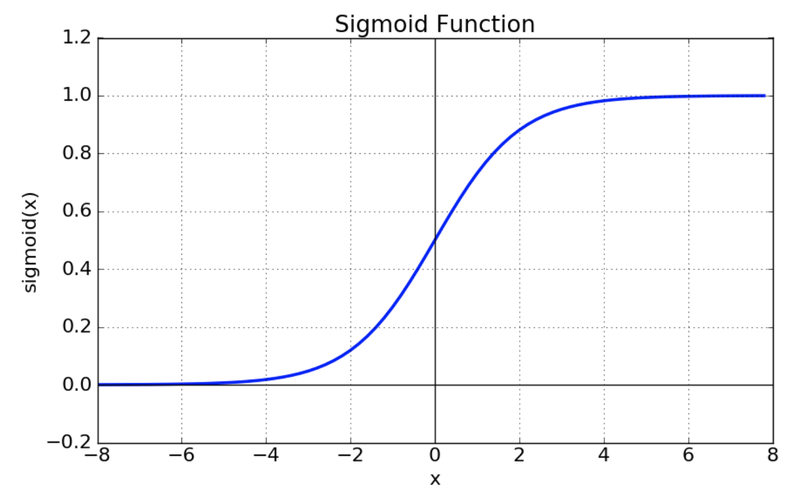

In [6]:
# 첫번째 은닉층의 출력 a1에다가 sigmoid를 적용

# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  


z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.7066205  0.8222681  0.60377913 0.32230782 0.25668015 0.25701577
 0.70020188 0.4122658  0.31567273 0.51993584 0.58126303 0.42984869
 0.49946537 0.40950312 0.42239192 0.25171746 0.57689499 0.89251939
 0.71864529 0.59752336 0.69373673 0.46496094 0.49727106 0.3248583
 0.1896776  0.72139981 0.21975949 0.4824577  0.63018325 0.43722089
 0.15104906 0.66938708 0.32386452 0.37005068 0.28398198 0.3819409
 0.15900329 0.59088803 0.65271165 0.7540602  0.65632474 0.68353478
 0.39763038 0.70946175 0.89183173 0.55155745 0.48702209 0.21259942
 0.41582923 0.41258118]


현재는 ReLU함수를 더 많이 사용한다. 왜냐하면, 

1. vanishing gradient현상이 발생한다.

2. exp 함수 사용시 비용이 크다.

#### Tanh

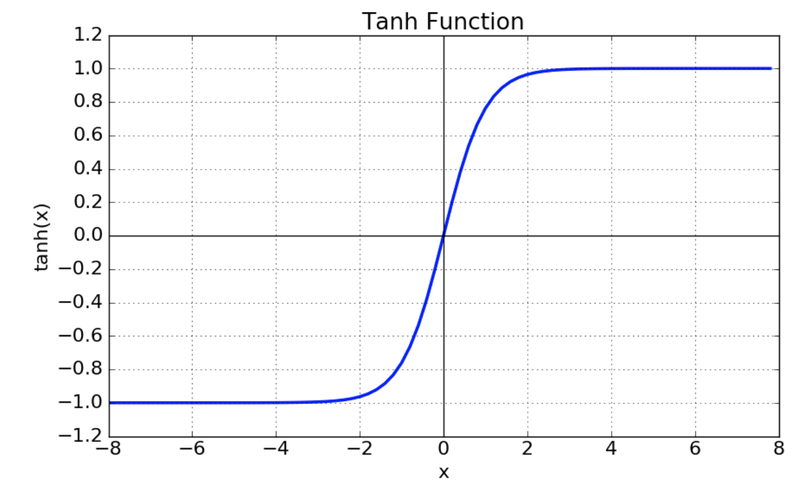

1. tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제를 해결함

2. vanishing gradient 문제 존재

#### ReLU

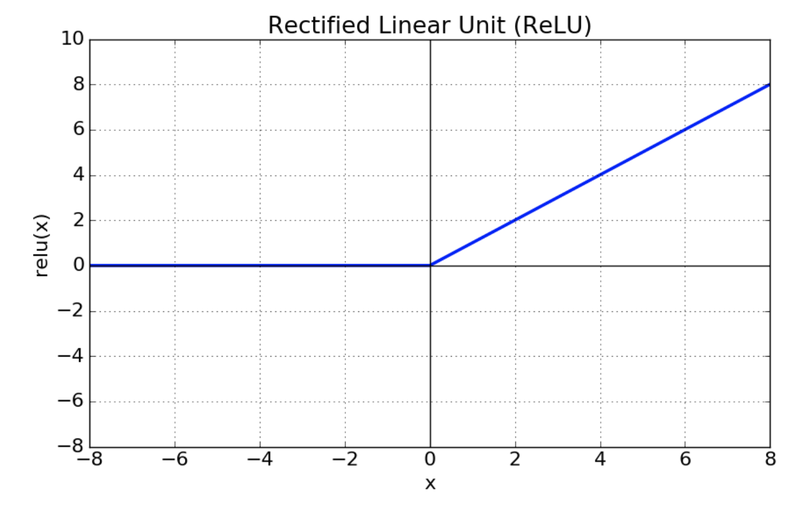

1. sigmoid, tanh 함수에 비해 학습이 빠름

2. 연산 비용이 크지 않고, 구현이 매우 간단하다.

sigmoid 다음에 다시 Dense 레이어가 출현한다. 출력 노드 개수만 다를 뿐 동일한 구조다. 그렇다면 MLP 레이어를 구현할 수 있다.

In [7]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('go~')

go~


In [8]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[ 0.11311158 -0.64160816  0.2617333  -0.01592992 -0.14862568  0.31571841
 -0.03118375 -0.42927046  0.69880251 -0.17801351]


모델의 최종 출력인 a2에 softmax 함수를 적용해보자. 그러면 모델의 출력은 입력 X가 10가지 숫자 중 하나의 확률의 형태로 가공된다.

In [9]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [10]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.10532673, 0.04951856, 0.12220366, 0.09257562, 0.08107138,
       0.12898216, 0.0911742 , 0.06123294, 0.18919121, 0.07872354])

#### 손실함수 (Loss Functions)

비선형 활성화 함수를 가진 여러 개의 은닉층을 거친 다음 신호 정보들은 출력층으로 전달된다. 이때 우리가 원하는 정답과 전달된 신호 정보들 사이의 차이를 계산하고, 이 차이를 줄이기 위해 각 파라미터들을 조정하는 것이 딥러닝의 전체적인 학습 흐름이다.

이 차이를 구하는 데 사용되는 함수는 손실함수(Loss function) 또는 비용함수(Cost function)라고 부른다. 대표적으로 다음과 같은 두 가지 손실함수가 존재한다.

#### 평균제곱오차(MSE: Mean Square Error)


#### 교차 엔트로피(Cross Entropy)

Cross Entropy는 두 확률분포 사이의 유사도가 클수록 작아지는 값이다. 아직 별로 학습되지 않은 모델이 출력하는 softmax 값 y는 10개의 숫자 각각의 확률이 대부분 0.1 근처를 오가는 정도다.

모델을 학습하게 되면, y가 점점 정답에 가까워지게 된다.

In [11]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

우리는 모델의 출력인 softmax(a2)와 정답 라벨의 One-hot 인코딩 분포가 유사해지기를 기대한다. 아직은 별로 유사하지 않다.

In [12]:
print(y_hat[0])
print(t[0])

[0.10532673 0.04951856 0.12220366 0.09257562 0.08107138 0.12898216
 0.0911742  0.06123294 0.18919121 0.07872354]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.5361530863615824

### 경사 하강법

오차는 구했다. 다음 단계는 뭘까?

앞서 말했지만, 우리의 목표는 이 오차를 줄이는 것이다. 이 상황은 우리가 마치 산꼭대기에 서 있는 것과 동일하게 생각할 수 있다. 우리는 얼른 이 산에서 내려가서 집에 가고 싶은 사람들이다. 내리막길을 따라 일단 내려갈 거 같다.

경사하강법(Gradient Descent) 또한 동일한 원리이다. 각 단계에서의 기울기를 구해서 해당 기울기가 가리키는 방향으로 이동하는 방법이다.

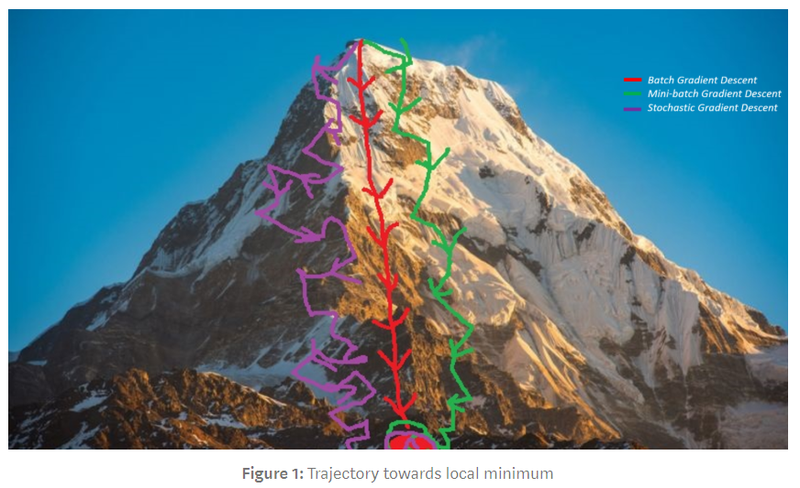

위의 이미지처럼 각 시점의 기울기가 가르키는 방향으로 이동해나가는 것이다. 그럼 경사하강법을 사용하면 항상 산 아래에 잘 도착할 수 있을까?

예를 들어, 우리가 너무 크게 발걸음을 내디딜 수 있는 거인이라면 아마도 산 아래로 내려가지 못하고 또 다른 골짜기에 빠질 것이다. 그래서 우리는 학습률(learning rate)라는 개념을 도입해 기울기 값과 이 학습률 곱한 만큼만 발걸음을 내딛는다.

또한, 이미 생각해 보신 분들도 있겠지만, 아무리 우리가 발검음을 잘 내디딘다고 해도 어디서 출발했느냐에 따라 산 아래로 내려가는 시간이 빨라질 수도 느려질 수도 있다. 이는 parameter의 값들을 어떻게 초기화하는지의 문제다.

X-Y 좌표축의 기울기란 X의 변화에 따른 Y의 변화량을 의미한다. Y를 X로 미분해서 구한다.

우리는 파라미터 W의 변화에 따른 오차(Loss) L의 변화량을 구하려고 한다. 그러면 오차 기울기가 커지는 방향의 반대 방향으로 파라미터를 조정해 주면 된다. 단 조정을 너무 많이 해주면 안 되기 때문에 적절한 step size 역활을 하는 learning rate가 필수적이다. 이 과정을 Numpy를 통해 구현해 보겠다.

In [14]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.02106535,  0.00990371,  0.02444073,  0.01851512,  0.01621428,
        -0.17420357,  0.01823484,  0.01224659,  0.03783824,  0.01574471],
       [-0.17763057,  0.00891685,  0.02676042,  0.01924795,  0.01513187,
         0.02227234,  0.01675746,  0.0127829 ,  0.03806855,  0.01769223],
       [ 0.02018287,  0.01013506,  0.0298786 ,  0.01796189, -0.18784028,
         0.02725061,  0.0212044 ,  0.01151542,  0.03338633,  0.0163251 ],
       [ 0.01793668, -0.19069124,  0.03102833,  0.01917386,  0.01260483,
         0.02490472,  0.02204998,  0.01052331,  0.0389165 ,  0.01355303],
       [ 0.01805659,  0.0080605 ,  0.02985684,  0.02286279,  0.01426664,
         0.02282136,  0.01894144,  0.01358571,  0.03630994, -0.18476181]])

dy란 loss/y를 말한다. 앞으로 어떤 변수 X에 대해 dXfks Loss/X를 의미하는 것으로 지칭하겠다.

일단 dy가 구해지면 다른 기울기들은 chain-rule로 쉽게 구해진다.

In [15]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.09004229, -0.06416191,  0.08553459,  0.06019189, -0.04525006,
        -0.02956998,  0.05757245,  0.03738843,  0.11156616, -0.12322928],
       [-0.04758212, -0.09341887,  0.08218997,  0.05779622, -0.02105794,
        -0.0924103 ,  0.05640194,  0.03582001,  0.10931734, -0.08705625],
       [-0.04412993, -0.1159677 ,  0.09221144,  0.06345446, -0.0751836 ,
        -0.07082295,  0.06353448,  0.03925154,  0.12035752, -0.07270525],
       [-0.02574939, -0.08220966,  0.05166631,  0.03477242, -0.0600956 ,
        -0.01221835,  0.0356086 ,  0.02135348,  0.0661588 , -0.0292866 ],
       [-0.08600547, -0.05246229,  0.07840329,  0.05426762, -0.08079703,
        -0.05201811,  0.05351292,  0.03412303,  0.10286853, -0.05189248],
       [-0.02133012, -0.08204092,  0.07278717,  0.04936626, -0.10271098,
        -0.03838207,  0.05029413,  0.03057228,  0.09322971, -0.05178546],
       [-0.09769085, -0.06807231,  0.0681404 ,  0.04780416, -0.01833624,
        -0.03188829,  0.0459628 ,  0.0297841 

같은 방식으로 우리가 학습해야 할 모든 파라미터 W1, b1, W2, b2에 대한 기울기를 모두 얻을 수 있다.

In [16]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

중간에 sigmoid가 한 번 사용되었으므로, 활성화 함수에 대한 gradient도 고려되어야 한다.

In [17]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [18]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

파라미터를 업데이트하는 함수를 생각해 보자. learning_rate도 고려해야 한다.

In [19]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

#### 오차역전파법

이제 우리는 손실 함수를 통해 구해진 오차를 가지고 각 파라미터들을 조정하는 경사하강법에 대해 알게 되었다. 그럼 이 기울기를 어떻게 입력층까지 전달하며 파라미터들을 조정해 나갈 수 있을까? 이 과정에서 쓰이는 개념이 오차역전파법(Backpropagation) 이다.

오차역전파법은 앞에서 설명한 MLP를 학습시키기 위한 일반적인 알고리즘 중 하나다. 이는 출력층의 결과와 내가 뽑고자 하는 target 값과의 차이를 구한 뒤, 그 오차 값을 각 레이어들을 지나며 역전파 해가며 각 노드가 가지고 있는 변수들을 갱신해 나가는 방식이다.

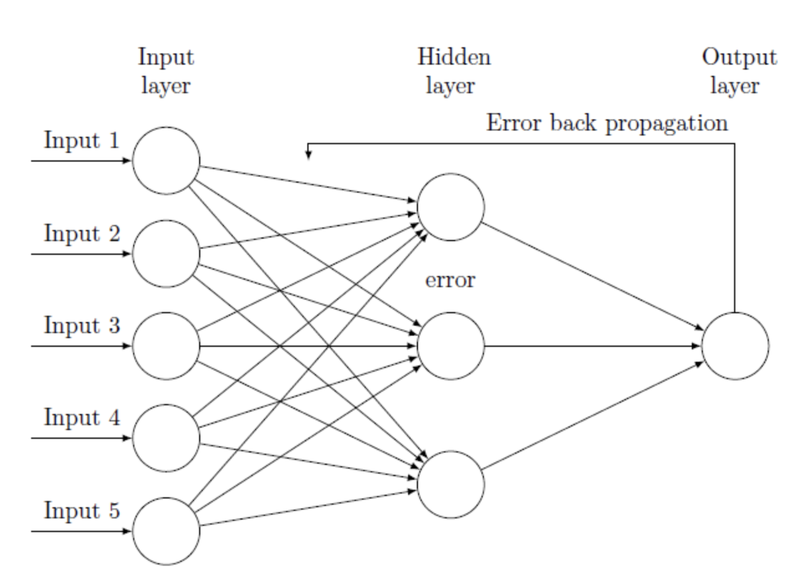

우의 과정을 하나의 레이에 대해 다음과 같이 정리할 수 있다. 이전의 affine_layer_forward(X, W, b)에 대응하여 생각해 보면 해당 레이어의 backpropagation 함수를 얻을 수 있다.

In [20]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

이상 정리된 내용을 바탕으로 Forward Propagation과 Backward Propagation이 이루어지는 한 사이클을 엮을 수 있다.

In [21]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.08569377 0.10788095 0.13323194 0.06723088 0.07880841 0.12720319
  0.07757119 0.08335527 0.11214301 0.1268814 ]
 [0.06964284 0.10097546 0.11728472 0.07008248 0.09098206 0.11044022
  0.08347034 0.09339157 0.12261099 0.14111932]
 [0.10482182 0.0828402  0.13298513 0.06258727 0.0943071  0.12342156
  0.08227976 0.0853406  0.10985188 0.12156468]
 [0.09626085 0.10481129 0.16205667 0.07305312 0.0678621  0.09657101
  0.08071584 0.07900932 0.1210776  0.11858221]
 [0.08510201 0.09371714 0.16215698 0.06899124 0.08854271 0.1227458
  0.09097736 0.07417688 0.12205976 0.09153013]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.3468449149013573


#### 모델학습 Step-by-Step

방금까지 나는 한 스텝의 Forward Propagation과 Backward Propagation을 통해 학습해야 할 파라미터 W1, b1, W2, b2가 업데이트 되는 과정을 확인했다.

과연 이렇게 파라미터가 업데이트 될 때, 우리의 모델은 점점 더 정확한 추론을 하게 되는 것일까? 업데이트 되는 과정을 다섯 스텝만 반복해 보면서 효과를 확인해 보자.

In [22]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [23]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.07634425 0.07448301 0.13149218 0.07613244 0.11233413 0.11115972
  0.11017316 0.09271458 0.08498592 0.1301806 ]
 [0.06834354 0.08059064 0.11588285 0.08082861 0.13939308 0.10625565
  0.10294308 0.10609311 0.08044557 0.11922386]
 [0.07988701 0.06961051 0.12331947 0.07371243 0.1343008  0.13485305
  0.11788067 0.08039172 0.06970173 0.11634261]
 [0.07466307 0.08468632 0.13090033 0.07598251 0.10077458 0.12706594
  0.10784463 0.11974854 0.07146961 0.10686447]
 [0.07856685 0.07721287 0.13722058 0.06614695 0.09709796 0.15230298
  0.09791676 0.10468044 0.07007174 0.11878287]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.2973855584162406
---------
[[0.0908869  0.0876675  0.10884682 0.06711335 0.12151681 0.12900951
  0.09436386 0.08001692 0.07531314 0.14526519]
 [0.08498645 0.09468153 0.09518017 0.07146489 0.15059366 0.11809959
  0.08828843 0.09100135 0.071

어떤가? 모델이 추론한 확률값 y_hat이 정답이 One-hot 인코딩 t 값에 조금씩 근접하는 것과, Loss가 점점 감소하는 것이 확인 되는가??

그렇다면 우리는 경사하강법을 통해 조금씩 파라미터를 제대로 업데이트해 가고 있따고 볼 수 있다.

이제 거의 근접했다. 몇 가지만 보완하면 우리는 모델 훈련 전과정을 완성할 수 있다.

### 추론 과정 구현과 정확도(ACCuracy) 계산

방금 5번 학습한 파라미터 W1, b1, W2, b2를 가지고도 우리는 숫자를 인식(Predict)해 보고, 그 정확도(Accuracy)를 측정할 수 있다.

In [24]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [25]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.1357598 , 0.12656576, 0.05887775, 0.04073187, 0.13456626,
       0.18367473, 0.05469148, 0.04649822, 0.046485  , 0.17214912])

추론한 결과의 정확도가 얼마나 될 지 계산해 보자.

In [26]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [27]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.1357598  0.12656576 0.05887775 0.04073187 0.13456626 0.18367473
 0.05469148 0.04649822 0.046485   0.17214912]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.09


5번의 학습만 가지고는 아직 10% 정도의 정확도에도 미치지 못하고 있다. 그럼 전체 학습 사이클을 제대로 수행해 보자

In [28]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [29]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3044377958223876
train acc, test acc | 0.09736666666666667, 0.0982
Loss:  0.8120751506251428
train acc, test acc | 0.7966833333333333, 0.8013
Loss:  0.48854858629974257
train acc, test acc | 0.87725, 0.8806
Loss:  0.3583669221231422
train acc, test acc | 0.8971833333333333, 0.9011
Loss:  0.49890075753827545
train acc, test acc | 0.9075666666666666, 0.9102
Loss:  0.3437402427726841
train acc, test acc | 0.9131, 0.9157
Loss:  0.43056497755782247
train acc, test acc | 0.9170666666666667, 0.919
Loss:  0.24864485531312958
train acc, test acc | 0.9218833333333334, 0.9224
Loss:  0.25223900415166234
train acc, test acc | 0.9270666666666667, 0.9278
Loss:  0.19284075322139832
train acc, test acc | 0.9306833333333333, 0.9306
Loss:  0.305655106070491
train acc, test acc | 0.9335, 0.9327
Loss:  0.11868931214628034
train acc, test acc | 0.9367, 0.9354
Loss:  0.2862883773775941
train acc, test acc | 0.9388666666666666, 0.9382
Loss:  0.15347758615333518
train ac

딥러닝 프레임워크가 없이도 Numpy만으로도 딥러닝이 가능하다는 것을 확인했다. 물론 아쉽게도 Numpy는 GPU를 지원하지 않으므로, 방금의 딥러닝은 CPU만 사용할 수 있었다. 하지만 이로써 우리는 딥러닝 프레임워크 안에서 일어나는 일의 대강에 대해서 추론해 볼 수 있게 되었다.

마지막으로 위 훈련 과정의 Accuracy, Loss 변화를 시각화해보자.

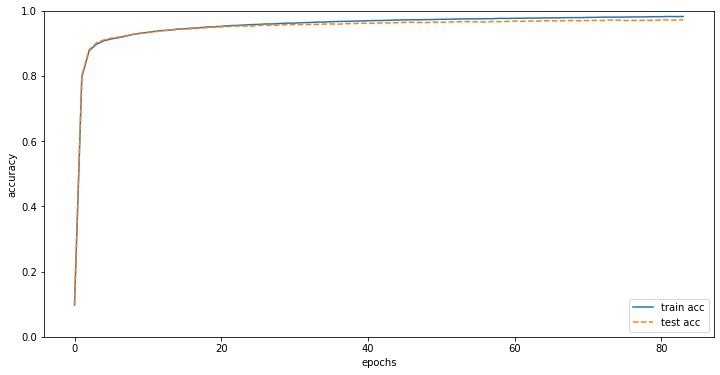

In [30]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

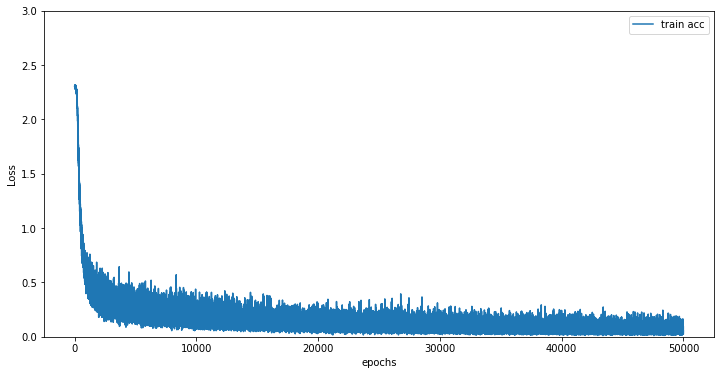

In [31]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()

지금까지 그동안 막연히 개념적으로만 이해해 왔던, 텐서플로우 같은 딥러닝 프레임워크에서 자동으로 수행되기 때문에 구체적인 동작 메커니즘이 잘 와닿지 않았던 딥러닝이라는 것을 좀 더 세부적으로 들여다보았다. 경사하강법과 오차역전파법을 통해 파라미터가 어떻게 최적화되는지를 이해하는데 오늘의 내용이 도움이 되었기를 바란다.